In [18]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
no2_2015 = pd.read_csv("no2_2015.csv")
no2_2016 = pd.read_csv("no2_2016.csv")
no2_2017 = pd.read_csv("no2_2017.csv")
no2_2018 = pd.read_csv("no2_2018.csv")
no2_2019 = pd.read_csv("no2_2019.csv")
no2_2020 = pd.read_csv("no2_2020.csv")
no2_2021 = pd.read_csv("no2_2021.csv")
no2_2022 = pd.read_csv("no2_2022.csv")
no2_2023 = pd.read_csv("no2_2023.csv")
no2_2024 = pd.read_csv("no2_2024.csv")

In [22]:
no2_data = pd.concat([no2_2015, no2_2016, no2_2017, no2_2018, no2_2019, no2_2020, no2_2021, no2_2022, no2_2023, no2_2024], ignore_index=True)

In [23]:
no2_data.shape

(327729, 21)

In [24]:
no2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327729 entries, 0 to 327728
Data columns (total 21 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Date                                327729 non-null  object 
 1   Source                              327729 non-null  object 
 2   Site ID                             327729 non-null  int64  
 3   POC                                 327729 non-null  int64  
 4   Daily Max 1-hour NO2 Concentration  327729 non-null  float64
 5   Units                               327729 non-null  object 
 6   Daily AQI Value                     327729 non-null  int64  
 7   Local Site Name                     327729 non-null  object 
 8   Daily Obs Count                     327729 non-null  int64  
 9   Percent Complete                    327729 non-null  float64
 10  AQS Parameter Code                  327729 non-null  int64  
 11  AQS Parameter Description 

In [25]:
no2_data.head()

,Date,Source,Site ID,POC,Daily Max 1-hour NO2 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,AQS Parameter Description,Method Code,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2015,AQS,60010007,1,28.0,ppb,26,Livermore,23,96.0,...,Nitrogen dioxide (NO2),74,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
1,01/02/2015,AQS,60010007,1,30.0,ppb,28,Livermore,23,96.0,...,Nitrogen dioxide (NO2),74,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
2,01/03/2015,AQS,60010007,1,30.9,ppb,28,Livermore,23,96.0,...,Nitrogen dioxide (NO2),74,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
3,01/04/2015,AQS,60010007,1,32.7,ppb,30,Livermore,23,96.0,...,Nitrogen dioxide (NO2),74,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
4,01/05/2015,AQS,60010007,1,34.6,ppb,32,Livermore,23,96.0,...,Nitrogen dioxide (NO2),74,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217


In [26]:
no2_data.to_csv("no2_data.csv")

/var/folders/vv/2tyv9bm12sz47cjgm0593wqc0000gn/T/ipykernel_11468/1644217533.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  butte["Date"]=pd.to_datetime(butte["Date"])
/var/folders/vv/2tyv9bm12sz47cjgm0593wqc0000gn/T/ipykernel_11468/1644217533.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc["Date"]=pd.to_datetime(sc["Date"])


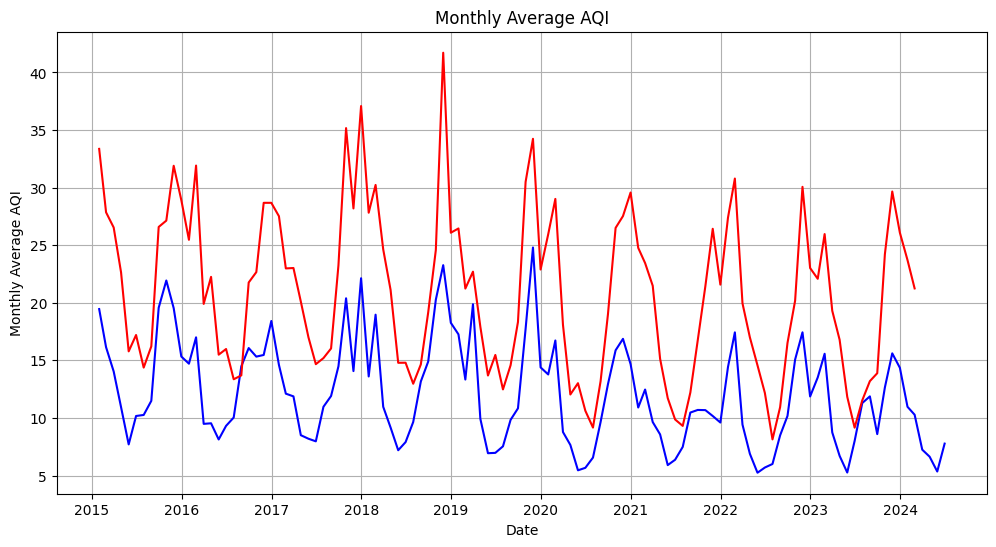

In [27]:
butte = no2_data[no2_data["County"] == "Butte"]
sc = no2_data[no2_data["County"] == "Santa Clara"]

butte["Date"]=pd.to_datetime(butte["Date"])
sc["Date"]=pd.to_datetime(sc["Date"])

butte.set_index('Date', inplace=True)
sc.set_index('Date', inplace=True)

# Calculate the monthly average of 'Daily AQI Value'
monthly_avg_butte = butte.resample('ME')['Daily AQI Value'].mean().reset_index()
monthly_avg_sc = sc.resample('ME')['Daily AQI Value'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_butte['Date'], monthly_avg_butte['Daily AQI Value'], color="blue")
plt.plot(monthly_avg_sc['Date'], monthly_avg_sc['Daily AQI Value'], color="red")
plt.xlabel('Date')
plt.ylabel('Monthly Average AQI')
plt.title('Monthly Average AQI')
plt.grid(True)
plt.show()

In [29]:
co_data = pd.read_csv("california_CO.csv")
ozone_data = pd.read_csv("Ozone.csv")

In [30]:
co_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209905 entries, 0 to 209904
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               209905 non-null  object 
 1   Source                             209905 non-null  object 
 2   Site ID                            209905 non-null  int64  
 3   POC                                209905 non-null  int64  
 4   Daily Max 8-hour CO Concentration  209905 non-null  float64
 5   Units                              209905 non-null  object 
 6   Daily AQI Value                    209905 non-null  int64  
 7   Local Site Name                    209905 non-null  object 
 8   Daily Obs Count                    209905 non-null  int64  
 9   Percent Complete                   209905 non-null  float64
 10  AQS Parameter Code                 209905 non-null  int64  
 11  AQS Parameter Description          2099

In [31]:
co_no2 = pd.merge(co_data, no2_data, how="inner", on =["Date", "Local Site Name"], suffixes=["_CO", "_NO2"])

In [32]:
co_no2.columns

Index(['Date', 'Source_CO', 'Site ID_CO', 'POC_CO',
       'Daily Max 8-hour CO Concentration', 'Units_CO', 'Daily AQI Value_CO',
       'Local Site Name', 'Daily Obs Count_CO', 'Percent Complete_CO',
       'AQS Parameter Code_CO', 'AQS Parameter Description_CO',
       'Method Code_CO', 'CBSA Code_CO', 'CBSA Name_CO', 'State FIPS Code_CO',
       'State_CO', 'County FIPS Code_CO', 'County_CO', 'Site Latitude_CO',
       'Site Longitude_CO', 'Source_NO2', 'Site ID_NO2', 'POC_NO2',
       'Daily Max 1-hour NO2 Concentration', 'Units_NO2',
       'Daily AQI Value_NO2', 'Daily Obs Count_NO2', 'Percent Complete_NO2',
       'AQS Parameter Code_NO2', 'AQS Parameter Description_NO2',
       'Method Code_NO2', 'CBSA Code_NO2', 'CBSA Name_NO2',
       'State FIPS Code_NO2', 'State_NO2', 'County FIPS Code_NO2',
       'County_NO2', 'Site Latitude_NO2', 'Site Longitude_NO2'],
      dtype='object')

In [33]:
full_df = pd.merge(co_no2, ozone_data, how="inner", on =["Date", "Local Site Name"], suffixes = ["", "_ozone"])

In [34]:
full_df.shape

(168677, 59)

In [35]:
full_df.columns

Index(['Date', 'Source_CO', 'Site ID_CO', 'POC_CO',
       'Daily Max 8-hour CO Concentration', 'Units_CO', 'Daily AQI Value_CO',
       'Local Site Name', 'Daily Obs Count_CO', 'Percent Complete_CO',
       'AQS Parameter Code_CO', 'AQS Parameter Description_CO',
       'Method Code_CO', 'CBSA Code_CO', 'CBSA Name_CO', 'State FIPS Code_CO',
       'State_CO', 'County FIPS Code_CO', 'County_CO', 'Site Latitude_CO',
       'Site Longitude_CO', 'Source_NO2', 'Site ID_NO2', 'POC_NO2',
       'Daily Max 1-hour NO2 Concentration', 'Units_NO2',
       'Daily AQI Value_NO2', 'Daily Obs Count_NO2', 'Percent Complete_NO2',
       'AQS Parameter Code_NO2', 'AQS Parameter Description_NO2',
       'Method Code_NO2', 'CBSA Code_NO2', 'CBSA Name_NO2',
       'State FIPS Code_NO2', 'State_NO2', 'County FIPS Code_NO2',
       'County_NO2', 'Site Latitude_NO2', 'Site Longitude_NO2', 'Source',
       'Site ID', 'POC', 'Daily Max 8-hour Ozone Concentration', 'Units',
       'Daily AQI Value', 'Daily Obs 

In [36]:
full_df = full_df[["Date", "Daily Max 8-hour CO Concentration", "Daily AQI Value_CO", "Units_CO",
         "Daily Obs Count_CO",'Daily Max 1-hour NO2 Concentration', 'Daily AQI Value_NO2', 'Units_NO2', 'Daily Obs Count_NO2',
       'Daily Max 8-hour Ozone Concentration', 'Daily AQI Value', 'Units', 'Daily Obs Count', 'CBSA Code', 'CBSA Name', 'State FIPS Code', 'State',
       'County FIPS Code', 'County', 'Site Latitude', 'Site Longitude']]

full_df = full_df.rename(columns={'Units':'Units_Ozone', 'Daily AQI Value': 'Daily AQI Value_Ozone', 'Daily Obs Count': 'Daily Obs Count_Ozone'})

full_df.columns
full_df.head()

,Date,Daily Max 8-hour CO Concentration,Daily AQI Value_CO,Units_CO,Daily Obs Count_CO,Daily Max 1-hour NO2 Concentration,Daily AQI Value_NO2,Units_NO2,Daily Obs Count_NO2,Daily Max 8-hour Ozone Concentration,...,Units_Ozone,Daily Obs Count_Ozone,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2020,0.7,8,ppm,18,21.3,20,ppb,23,0.020,...,ppm,17,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.743065,-122.169935
1,01/02/2020,0.7,8,ppm,24,29.4,27,ppb,23,0.011,...,ppm,17,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.743065,-122.169935
2,01/03/2020,0.9,10,ppm,24,31.9,29,ppb,23,0.007,...,ppm,17,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.743065,-122.169935
3,01/04/2020,0.8,9,ppm,24,23.0,22,ppb,23,0.024,...,ppm,17,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.743065,-122.169935
4,01/05/2020,0.7,8,ppm,24,22.9,21,ppb,23,0.030,...,ppm,17,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.743065,-122.169935


In [37]:
full_df.to_csv("full_df.csv")

In [38]:
full_df['Date'] = pd.to_datetime(full_df['Date'])
full_df = full_df.sort_values(by='Date')
full_df["Month"] = full_df['Date'].dt.month
full_df["Year"] = full_df['Date'].dt.year

In [39]:
full_df.set_index('Date', inplace=True)

In [40]:
full_df.columns

Index(['Daily Max 8-hour CO Concentration', 'Daily AQI Value_CO', 'Units_CO',
       'Daily Obs Count_CO', 'Daily Max 1-hour NO2 Concentration',
       'Daily AQI Value_NO2', 'Units_NO2', 'Daily Obs Count_NO2',
       'Daily Max 8-hour Ozone Concentration', 'Daily AQI Value_Ozone',
       'Units_Ozone', 'Daily Obs Count_Ozone', 'CBSA Code', 'CBSA Name',
       'State FIPS Code', 'State', 'County FIPS Code', 'County',
       'Site Latitude', 'Site Longitude', 'Month', 'Year'],
      dtype='object')

In [41]:
monthly_avg_CO = full_df.resample('M')['Daily Max 8-hour CO Concentration'].mean().reset_index()

/var/folders/vv/2tyv9bm12sz47cjgm0593wqc0000gn/T/ipykernel_11468/1394217285.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_CO = full_df.resample('M')['Daily Max 8-hour CO Concentration'].mean().reset_index()


In [42]:
monthly_avg_CO

,Date,Daily Max 8-hour CO Concentration
0,2015-01-31,0.752174
1,2015-02-28,0.563570
2,2015-03-31,0.467089
3,2015-04-30,0.352240
4,2015-05-31,0.271231
...,...,...
111,2024-04-30,0.317852
112,2024-05-31,0.240572
113,2024-06-30,0.252005
114,2024-07-31,0.315673


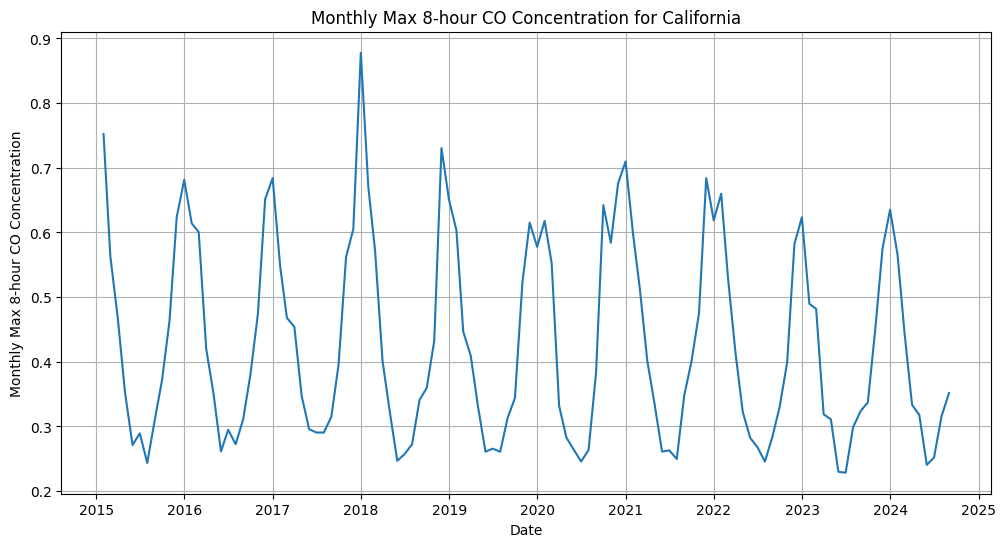

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_CO["Date"], monthly_avg_CO['Daily Max 8-hour CO Concentration'])
plt.xlabel('Date')
plt.ylabel('Monthly Max 8-hour CO Concentration')
plt.title('Monthly Max 8-hour CO Concentration for California')
plt.grid(True)
plt.show()

In [44]:
monthly_avg_AQI = full_df.resample('ME')['Daily AQI Value_Ozone'].mean().reset_index()

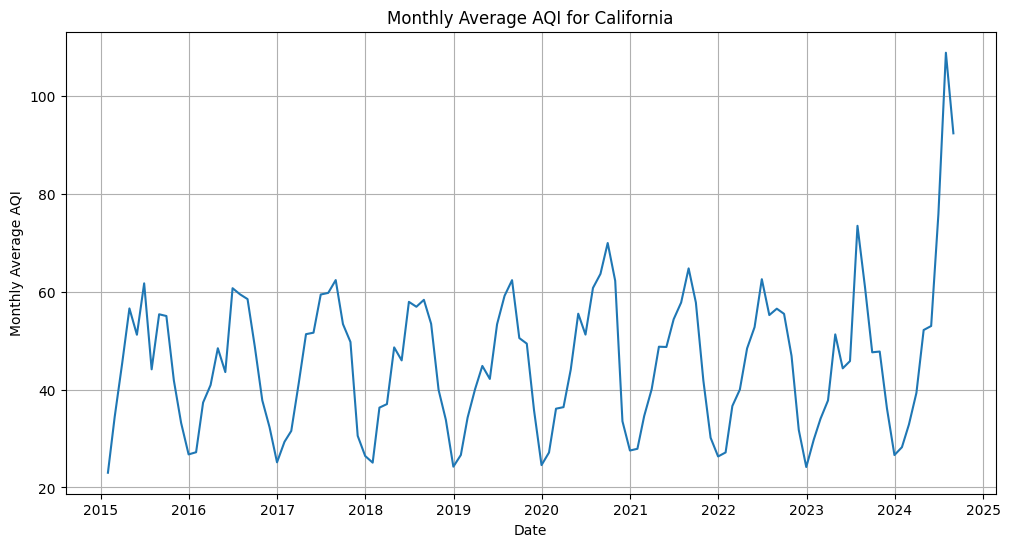

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_AQI["Date"], monthly_avg_AQI['Daily AQI Value_Ozone'])
plt.xlabel('Date')
plt.ylabel('Monthly Average AQI')
plt.title('Monthly Average AQI for California')
plt.grid(True)
plt.show()

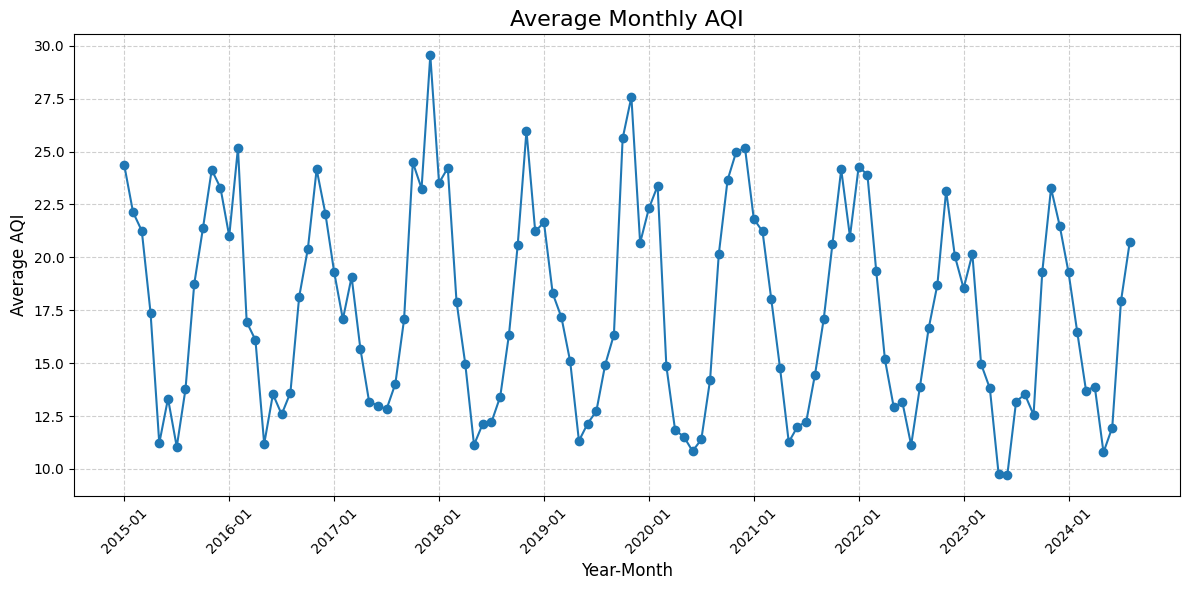

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'no2_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Convert the Date column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Extract year and month from the Date column
data['YearMonth'] = data['Date'].dt.to_period('M')

# Calculate the average AQI for each month
monthly_avg_aqi = data.groupby('YearMonth')['Daily AQI Value'].mean().reset_index()

# Plot the average monthly AQI
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_aqi['YearMonth'].astype(str), monthly_avg_aqi['Daily AQI Value'], marker='o', linestyle='-')
plt.title('Average Monthly AQI', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)

# Adjust x-axis ticks to show fewer labels
x_labels = monthly_avg_aqi['YearMonth'].astype(str)
step = 12  # Change this to adjust the interval (e.g., every 6 months or 12 months)
plt.xticks(range(0, len(x_labels), step), x_labels[::step], rotation=45, fontsize=10)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [4]:
pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 23.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 24.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


<Figure size 1200x800 with 0 Axes>

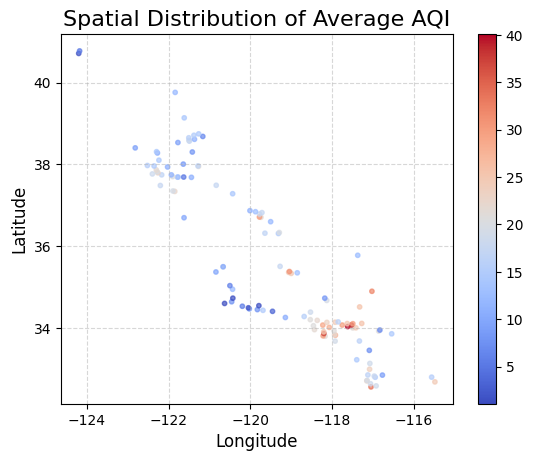

In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'no2_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Ensure latitude and longitude columns are present
if 'Site Latitude' in data.columns and 'Site Longitude' in data.columns:
    # Group by location and calculate average AQI
    spatial_data = data.groupby(['Site Latitude', 'Site Longitude'])['Daily AQI Value'].mean().reset_index()
    spatial_data.columns = ['Latitude', 'Longitude', 'Average AQI']

    # Create a GeoDataFrame
    gdf = gpd.GeoDataFrame(
        spatial_data,
        geometry=gpd.points_from_xy(spatial_data['Longitude'], spatial_data['Latitude'])
    )

    # Plot the spatial distribution of AQI
    plt.figure(figsize=(12, 8))
    gdf.plot(column='Average AQI', cmap='coolwarm', legend=True, markersize=10, alpha=0.7)
    plt.title('Spatial Distribution of Average AQI', fontsize=16)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
else:
    print("The dataset does not contain latitude and longitude columns for spatial plotting.")


<Figure size 1200x800 with 0 Axes>

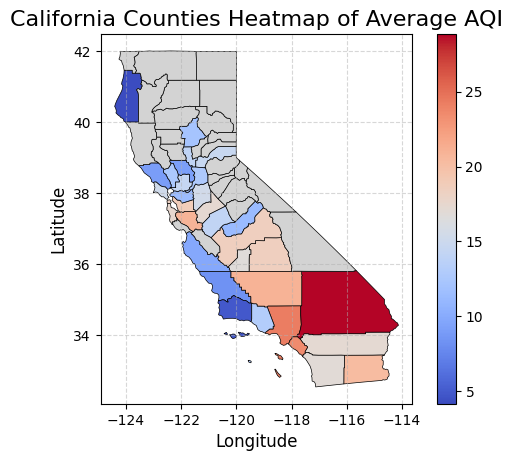

In [8]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import shape, Polygon, MultiPolygon
import matplotlib.pyplot as plt

# Load the GeoJSON file
geojson_path = 'california-counties_780.geojson'

# Read the GeoJSON file as a dictionary
california_geojson = gpd.read_file(geojson_path)

# Fix any invalid geometries
california_geojson['geometry'] = california_geojson['geometry'].apply(
    lambda geom: geom if geom.is_valid else geom.buffer(0))

# Load the AQI dataset
file_path = 'no2_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Filter for California and calculate average AQI by county
california_data = data[data['State'] == 'California']
county_aqi = california_data.groupby('County')['Daily AQI Value'].mean().reset_index()
county_aqi.columns = ['NAME', 'Average AQI']

# Merge GeoJSON with AQI data
merged_geo = california_geojson.merge(county_aqi, on='NAME', how='left')

# Plot the heatmap
plt.figure(figsize=(12, 8))
merged_geo.plot(
    column='Average AQI',
    cmap='coolwarm',
    legend=True,
    edgecolor='black',
    linewidth=0.5,
    missing_kwds={"color": "lightgrey", "label": "No Data"}
)
plt.title('California Counties Heatmap of Average AQI', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
